In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt

In [17]:
import numpy as np
import pandas as pd

# Reflect Tables into SQLAlchemy ORM

In [18]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [19]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [20]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [54]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
#today=365 days ago (ignore leap years cus no)

query = session.query(Measurement.date, func.sum(Measurement.prcp)).\
group_by(Measurement.date).order_by(Measurement.id.desc()).limit(365).all()


# Design a query to retrieve the last 12 months of precipitation data and plot the results
year_back = latest_date - dt.timedelta(days = 365)
prcps = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_back)





#date_prcp_query = session.query(Measurement.date, Measurement.prcp).\
#filter(Measurement.date >='2016-08-23', Measurement.date <='2017-08-23').\
#order_by(Measurement.date).statement

In [49]:
# Calculate the date 1 year ago from the last data point in the database


#last_date=data.index.max()

#year_ago = last_date - dt.timedelta(days=365)
#year_ago

In [57]:
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
data = pd.DataFrame(query, columns=['Date', 'Precipitation'])
data = data.sort_index(ascending=False)
data = data.reset_index()
data = data.drop("index", 1)
data = data.set_index('Date')
data.head()
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


,Precipitation
Date,
2016-08-07,3.34
2016-08-08,0.66
2016-08-09,0.59
2016-08-10,0.00
2016-08-11,0.09


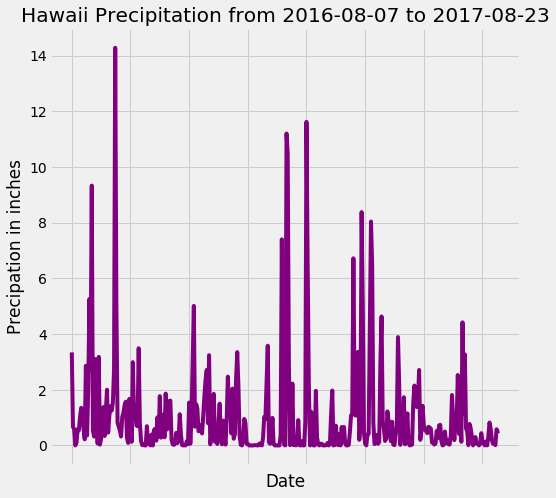

In [58]:
# Use Pandas Plotting with Matplotlib to plot the data
data.plot(figsize = (7.5, 7.5), rot = 45, color='purple', use_index = True, legend=False)
# plt.tight_layout()
plt.ylabel('Precipation in inches')
plt.xlabel('Date')
plt.title("Hawaii Precipitation from %s to %s" % (data.index.min(),data.index.max()))
plt.savefig("Results/BP_PrecipitationData")
plt.show()

![precipitation](Images/precipitation.png)

In [68]:
# Use Pandas to calcualte the summary statistics for the precipitation data
d_summary = data.describe()
d_summary


,Precipitation
count,365.000000
mean,1.026795
std,1.794630
min,0.000000
25%,0.060000
50%,0.440000
75%,1.150000
max,14.280000


![describe](Images/describe.png)

In [64]:
# Design a query to show how many stations are available in this dataset?
StationCount = session.query(Station.id).count()
print(f'There are {StationCount} stations.')

There are 9 stations.


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
ActiveStations = session.query(Measurement.station,func.count(Measurement.station)). \
                 group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
        
ActiveStations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [69]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
MostActStationId = "USC00519281"

Active_TObs = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.id.desc()). \
    filter(Measurement.station == MostActStationId).limit(365).all()
    
Active_TObs

[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

In [70]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
TempObs = pd.DataFrame(Active_TObs, columns=["Date", "Temperature Observations"])
TempObs.head()

,Date,Temperature Observations
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0


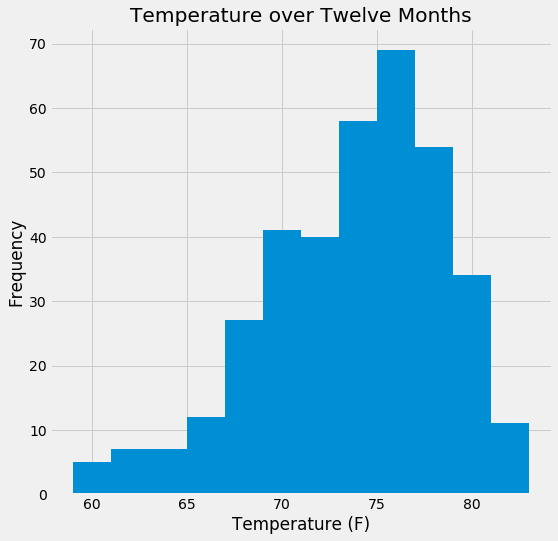

In [72]:
plt.figure(figsize = (8, 8))
plt.hist(TempObs["Temperature Observations"], bins=12)
plt.grid
plt.ylabel("Frequency")
plt.xlabel("Temperature (F)")
plt.title("Temperature over Twelve Months")
plt.savefig("Results/BP_TempHistogram")
plt.show()

![precipitation](Images/station-histogram.png)

# Optional Challenge Assignment

# <h>I opt out of the Optional Challenge Assignment</h>

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


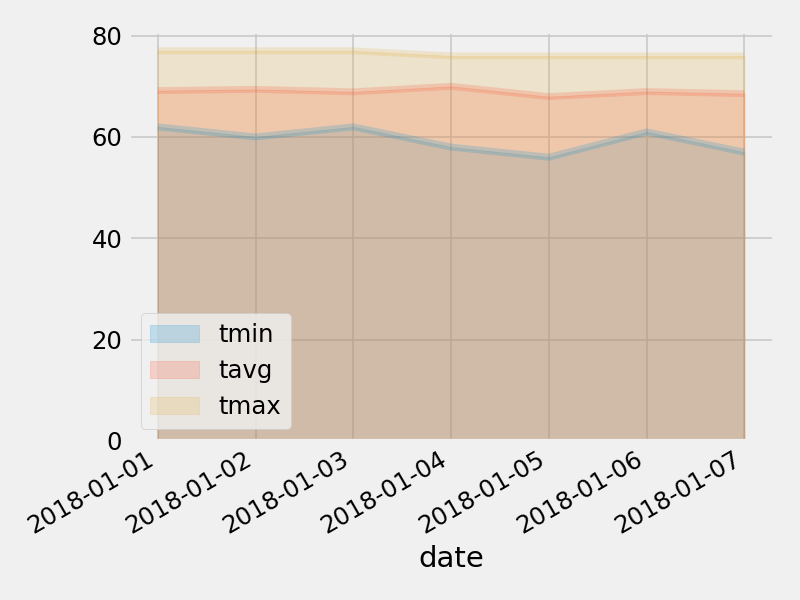

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
